In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import scanpy.external as sce
import tabulate
import gget

# local imports
import utils as ut
import plotting as plt2


sc.settings.verbosity = 3  

# load the pangload markers

In [2]:
fpath = "../resources/PanglaoDB_Augmented_2021.txt"
pang = ut.load_pathway(fpath)  # Assuming 'ut.load_pathway' is a custom function to load the data

# Get gene sets
fb_genes = pang[pang['Fibroblasts']].index
hsc_genes = pang[pang['Hematopoietic Stem Cells']].index

# Print statements with clear descriptions
print(f"Number of genes for Fibroblasts: {len(fb_genes)}")
print(f"Number of genes for Hematopoietic Stem Cells: {len(hsc_genes)}")

Number of genes for Fibroblasts: 232
Number of genes for Hematopoietic Stem Cells: 178


# Load isoforms

In [3]:
fpath = "/scratch/indikar_root/indikar1/cstansbu/HSC/scanpy/merged_isoforms.h5ad"
adata = sc.read_h5ad(fpath)
adata.obs['new_cluster_str'] = adata.obs['new_cluster'].apply(lambda x: f"F{int(x) + 1}")
adata.X = adata.layers['log_norm'].copy()
sc.logging.print_memory_usage()
adata

Memory usage: current 26.14 GB, difference +26.14 GB


AnnData object with n_obs × n_vars = 16130 × 99720
    obs: 'transcript_count', 'cluster_str', 'dataset', 'pred_phase', 'leiden', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'new_cluster', 'UMAP 1', 'UMAP 2', 'new_cluster_str'
    var: 'transcript_count', 'gene_name', 'gene_count', 'transcript_percent', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'combat', 'log_norm', 'magic', 'norm', 'raw_counts'
    obsp: 'connectivities', 'distances'

# Filtering

In [4]:

adata = adata[~adata.obs['new_cluster_str'].isin(['F8', 'F9'])].copy()
adata.obs['new_cluster_str'].value_counts()

new_cluster_str
F1    4324
F2    3790
F3    3508
F4    1461
F5    1249
F6     582
F7     561
Name: count, dtype: int64

# clustering

In [5]:
# remove existing color assignments
uns_keys = list(adata.uns.keys())
for key in uns_keys:
    if "_colors" in key:
        del adata.uns[key]

sc.tl.leiden(
    adata, 
    resolution=0.9,
    key_added='iso_cluster'
)

adata.obs['iso_cluster_str'] = adata.obs['iso_cluster'].apply(lambda x: f"H{int(x) + 1}")
adata.obs['iso_cluster'].value_counts()

adata

running Leiden clustering


/tmp/ipykernel_2699495/2148494053.py:7: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(


    finished: found 7 clusters and added
    'iso_cluster', the cluster labels (adata.obs, categorical) (0:00:01)


AnnData object with n_obs × n_vars = 15475 × 99720
    obs: 'transcript_count', 'cluster_str', 'dataset', 'pred_phase', 'leiden', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'new_cluster', 'UMAP 1', 'UMAP 2', 'new_cluster_str', 'iso_cluster', 'iso_cluster_str'
    var: 'transcript_count', 'gene_name', 'gene_count', 'transcript_percent', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'log1p', 'neighbors', 'pca', 'umap', 'iso_cluster'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'combat', 'log_norm', 'magic', 'norm', 'raw_counts'
    obsp: 'connectivities', 'distances'

# Cluster Viz

(-6.271075367927551, 13.875553727149963, 1.6324389219284057, 16.29118654727936)

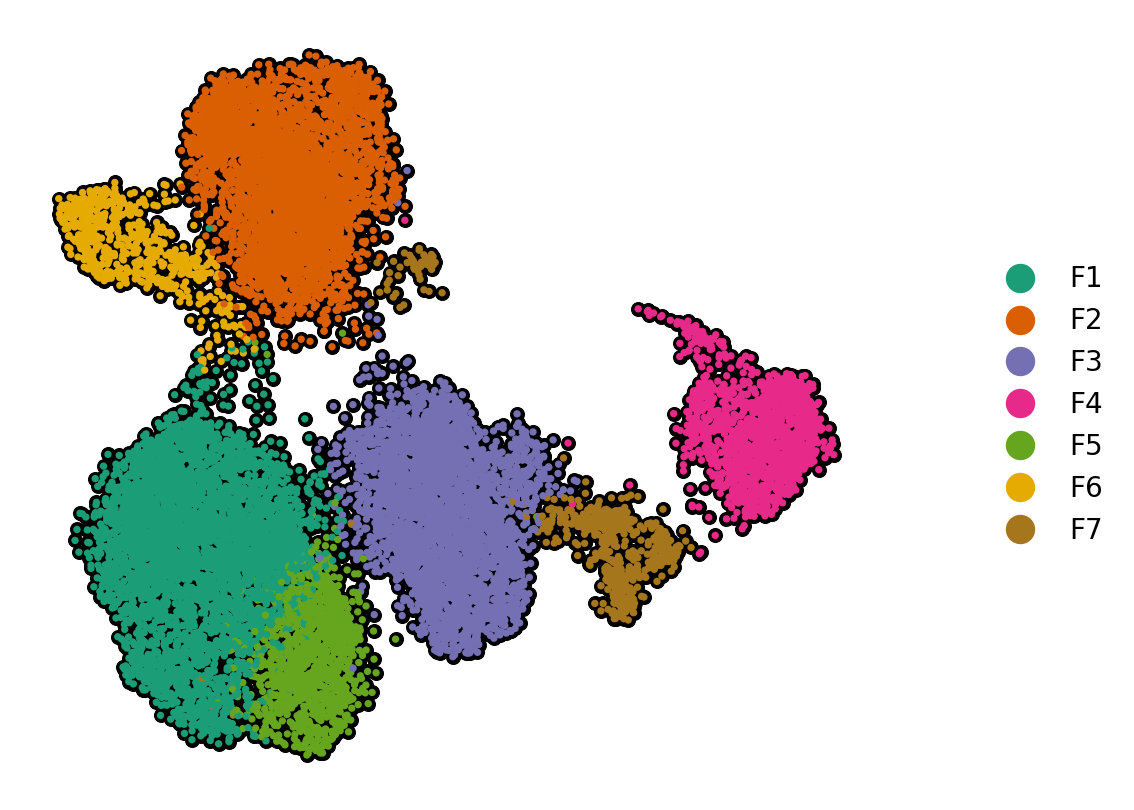

In [6]:
pdf = adata.obs.copy()
pdf = pdf.sort_values(by='iso_cluster', ascending=False,)

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 5.5, 5

# Base scatterplot (black dots)
sns.scatterplot(
    data=pdf,
    x='UMAP 1',
    y='UMAP 2',
    ec='k',
    color='k',
    s=25,
    zorder=1,
)

# Base scatterplot (black dots)
sns.scatterplot(
    data=pdf,
    x='UMAP 1',
    y='UMAP 2',
    ec='none',
    hue='new_cluster_str',
    palette='Dark2',
    s=7,
    zorder=1,
)

ax = plt.gca()

ax.set_yticks([])
ax.set_xticks([])
ax.set_aspect("auto")
ax.set_ylabel("")
ax.set_xlabel("")

sns.move_legend(
    ax,
    markerscale=4,
    loc='center right',
    title="",
    frameon=False,
    bbox_to_anchor=(1.3, 0.5),
)

plt.axis(False)

In [7]:
# sns.scatterplot(
#     data=pdf,
#     x='UMAP 1',
#     y='UMAP 2',
#     ec='k',
#     hue='cluster_str',
#     s=6,
#     zorder=1,
# )

In [8]:
# break

# DEG

In [9]:
adata

AnnData object with n_obs × n_vars = 15475 × 99720
    obs: 'transcript_count', 'cluster_str', 'dataset', 'pred_phase', 'leiden', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'new_cluster', 'UMAP 1', 'UMAP 2', 'new_cluster_str', 'iso_cluster', 'iso_cluster_str'
    var: 'transcript_count', 'gene_name', 'gene_count', 'transcript_percent', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'log1p', 'neighbors', 'pca', 'umap', 'iso_cluster'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'combat', 'log_norm', 'magic', 'norm', 'raw_counts'
    obsp: 'connectivities', 'distances'

In [10]:
adata.obs['cluster_label'] = np.where(adata.obs['new_cluster_str'].isin(['F4', 'F7']), 'HSC-like', 'Fib-like')
adata.obs['cluster_label'].value_counts()

cluster_label
Fib-like    13453
HSC-like     2022
Name: count, dtype: int64

In [11]:
layer='log_norm'
    
sc.tl.rank_genes_groups(
    adata, 
    groupby="cluster_label",
    method='wilcoxon',
    corr_method='benjamini-hochberg',
    layer=layer,
    use_raw=False,
    pts=True,
    key_added='deg',
)

deg = sc.get.rank_genes_groups_df(
    adata, 
    group=None,
    key='deg',
)

deg

ranking genes


... storing 'cluster_label' as categorical


    finished: added to `.uns['deg']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:03:19)


,group,names,scores,logfoldchanges,pvals,pvals_adj,pct_nz_group,pct_nz_reference
0,Fib-like,PPIA-204,47.187634,4.674989,0.0,0.0,0.897718,0.525717
1,Fib-like,TXN-202,46.744873,1.754551,0.0,0.0,0.990039,0.933234
2,Fib-like,CD59-211,45.703754,4.723061,0.0,0.0,0.843083,0.377349
3,Fib-like,ELOB-203,44.889977,3.494461,0.0,0.0,0.936222,0.618694
4,Fib-like,PFN1-201,43.287678,1.320039,0.0,0.0,0.996432,0.964886
...,...,...,...,...,...,...,...,...
199435,HSC-like,PFN1-201,-43.287678,-1.320039,0.0,0.0,0.964886,0.996432
199436,HSC-like,ELOB-203,-44.889977,-3.494461,0.0,0.0,0.618694,0.936222
199437,HSC-like,CD59-211,-45.703754,-4.723061,0.0,0.0,0.377349,0.843083
199438,HSC-like,TXN-202,-46.744873,-1.754551,0.0,0.0,0.933234,0.990039


In [12]:
# load the cadidates
fpath = "../resources/isoform_database.csv"
iso = pd.read_csv(fpath)
print(f"{iso.shape=}")

# some filtering
# iso = iso[iso['n_transcripts'] > 1]
# iso = iso[iso['n_protein'] > 1]
# iso = iso[iso['transcript_biotype'] == 'protein_coding']

print(f"{iso.shape=}")

iso.head()

iso.shape=(78286, 7)
iso.shape=(78286, 7)


,gene_name,gene_biotype,transcript_name,transcript_biotype,UniProtKB,n_transcripts,n_protein
0,ATAD3B,protein_coding,ATAD3B-206,protein_coding,Q5T9A4,2.0,2.0
1,ATAD3B,protein_coding,ATAD3B-201,protein_coding,A0A5K1VW56,2.0,2.0
2,PRDM16,protein_coding,PRDM16-206,protein_coding,D6RDW0,5.0,5.0
3,PRDM16,protein_coding,PRDM16-208,protein_coding,D6RFY3,5.0,5.0
4,PRDM16,protein_coding,PRDM16-201,protein_coding,Q9HAZ2,5.0,5.0


# Thresholding

In [28]:
sig = deg.copy()
pvals_adj = 0.05
logfoldchanges = 0.0

query_trx = iso['transcript_name'].values

# sig = sig[sig['pvals_adj'] < pvals_adj]
sig = sig[sig['logfoldchanges'] > logfoldchanges]
sig = sig[sig['names'].isin(query_trx)]

sig = pd.merge(
    sig, iso, how='left',
    left_on='names', 
    right_on='transcript_name',
)

sig = sig.sort_values(by='logfoldchanges', ascending=False)
sig = sig[sig['group'] == 'HSC-like']
print(f"{sig.shape=}")
print(sig['gene_name'].unique()[:25])
print("\n \n")

sig.head(15)

sig.shape=(12140, 15)
['ALDH1A1' 'NFKBIZ' 'IGF2' 'PHYHD1' 'SGCE' 'DIRAS2' 'CSF2RB' 'TTC8'
 'SCARB2' 'SCN2A' 'KCNS1' 'TJP2' 'KCNJ3' 'TSHZ2' 'CSTF1' 'NBEA' 'INPP4B'
 'ASNS' 'GNAI1' 'NLRP1' 'OGN' 'LRRFIP2' 'JAZF1' 'LUC7L' 'SLC38A4']

 



,group,names,scores,logfoldchanges,pvals,pvals_adj,pct_nz_group,pct_nz_reference,gene_name,gene_biotype,transcript_name,transcript_biotype,UniProtKB,n_transcripts,n_protein
35449,HSC-like,ALDH1A1-204,0.538693,25.337317,0.590099,1.0,0.007418,0.0,ALDH1A1,protein_coding,ALDH1A1-204,protein_coding,Q5SYQ7,4.0,4.0
36071,HSC-like,NFKBIZ-201,0.287303,24.465143,0.773880,1.0,0.003956,0.0,NFKBIZ,protein_coding,NFKBIZ-201,protein_coding,Q9BYH8,5.0,5.0
36450,HSC-like,IGF2-201,0.215477,23.978764,0.829395,1.0,0.002967,0.0,IGF2,protein_coding,IGF2-201,protein_coding,P01344,1.0,1.0
36735,HSC-like,PHYHD1-204,0.179564,23.624384,0.857495,1.0,0.002473,0.0,PHYHD1,protein_coding,PHYHD1-204,nonsense_mediated_decay,G5E9M0,9.0,9.0
36734,HSC-like,SGCE-270,0.179564,23.616995,0.857495,1.0,0.002473,0.0,SGCE,protein_coding,SGCE-270,protein_coding,A0A2R8Y6U6,56.0,56.0
37103,HSC-like,DIRAS2-201,0.143652,23.457319,0.885776,1.0,0.001978,0.0,DIRAS2,protein_coding,DIRAS2-201,protein_coding,Q96HU8,3.0,3.0
36736,HSC-like,CSF2RB-201,0.179564,23.434931,0.857495,1.0,0.002473,0.0,CSF2RB,protein_coding,CSF2RB-201,protein_coding,P32927,2.0,2.0
37106,HSC-like,TTC8-211,0.143652,23.370424,0.885776,1.0,0.001978,0.0,TTC8,protein_coding,TTC8-211,protein_coding,G3V324,10.0,10.0
37101,HSC-like,SCARB2-221,0.143652,23.357378,0.885776,1.0,0.001978,0.0,SCARB2,protein_coding,SCARB2-221,nonsense_mediated_decay,A0A1W2PS70,14.0,14.0
37105,HSC-like,SCN2A-203,0.143652,23.320770,0.885776,1.0,0.001978,0.0,SCN2A,protein_coding,SCN2A-203,protein_coding,F6U291,11.0,11.0


In [29]:
cdf = sig[sig['gene_name'].isin(hsc_genes)]
print(f"{cdf.shape=}")

columns = [
 'gene_name',
 'transcript_name',
 'transcript_biotype',
 'logfoldchanges',
 'pvals_adj',
 'pct_nz_group',
 'pct_nz_reference',
 'UniProtKB',
]

cdf[columns].head(25)

cdf.shape=(84, 15)


,gene_name,transcript_name,transcript_biotype,logfoldchanges,pvals_adj,pct_nz_group,pct_nz_reference,UniProtKB
35449,ALDH1A1,ALDH1A1-204,protein_coding,25.337317,1.000000e+00,0.007418,0.000000,Q5SYQ7
36736,CSF2RB,CSF2RB-201,protein_coding,23.434931,1.000000e+00,0.002473,0.000000,P32927
38470,GATA3,GATA3-201,protein_coding,22.420250,1.000000e+00,0.000989,0.000000,P23771
40523,PTGS1,PTGS1-208,protein_coding,21.389500,1.000000e+00,0.000495,0.000000,A0A2R8YDM0
40875,TLR2,TLR2-204,protein_coding,21.379261,1.000000e+00,0.000495,0.000000,A0A0S2Z4L7
40401,ACE,ACE-215,protein_coding,21.251574,1.000000e+00,0.000495,0.000000,J3KS28
40655,CD33,CD33-201,protein_coding,21.239780,1.000000e+00,0.000495,0.000000,P20138
34835,ALDH1A1,ALDH1A1-203,protein_coding,6.505433,1.000000e+00,0.016320,0.000223,Q5SYQ8
37744,CD36,CD36-204,protein_coding,4.319696,1.000000e+00,0.001484,0.000074,E7EU05
35497,KITLG,KITLG-206,nonsense_mediated_decay,4.273392,1.000000e+00,0.007418,0.000446,A0A2R8Y515


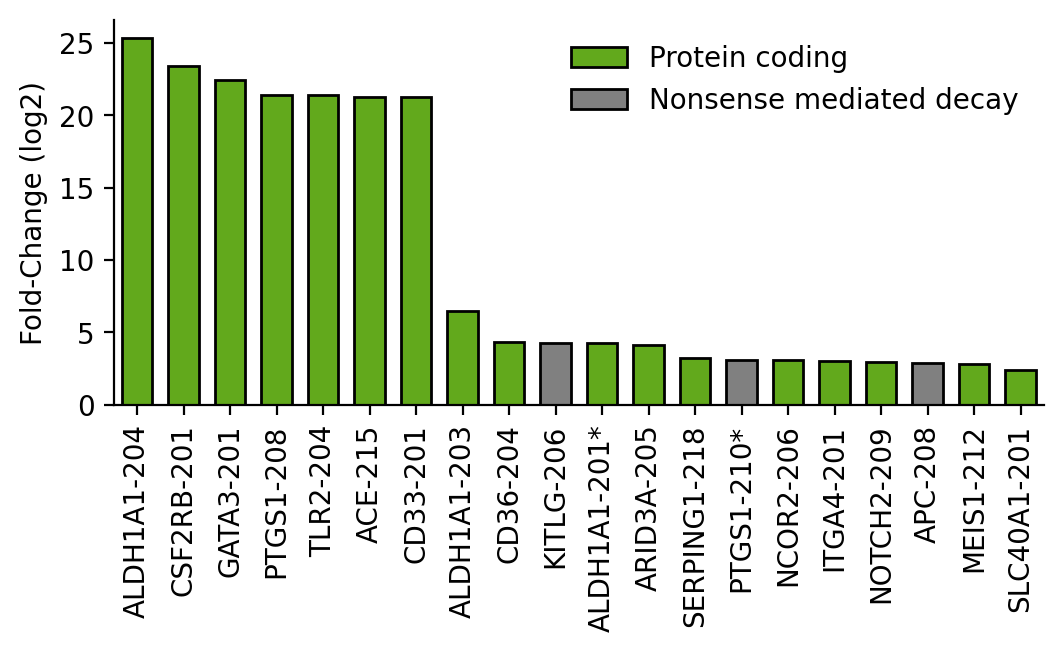

In [53]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 6, 2.5

n_genes = 20
alpha = 0.05
plot_df = cdf.head(n_genes).copy()
plot_df['sig'] = np.where(plot_df['pvals_adj'] <= alpha, "*", "")
plot_df['label'] = plot_df['transcript_name'] + plot_df['sig']
plot_df['transcript_biotype'] = plot_df['transcript_biotype'].str.replace("_", " ")
plot_df['transcript_biotype'] = plot_df['transcript_biotype'].str.capitalize()

sns.barplot(
    data=plot_df,
    x='label',
    y='logfoldchanges',
    hue='transcript_biotype',
    width=0.65,
    ec='k',
    palette=['#62C104', 'grey'],
)

plt.gca().tick_params(axis='x', rotation=90)
plt.xlabel("")
plt.ylabel("Fold-Change (log2)")

sns.move_legend(
    plt.gca(),
    loc='best',
    frameon=False,
    title="",
)

sns.despine()

In [15]:
list(cdf.columns)

['group',
 'names',
 'scores',
 'logfoldchanges',
 'pvals',
 'pvals_adj',
 'pct_nz_group',
 'pct_nz_reference',
 'gene_name',
 'gene_biotype',
 'transcript_name',
 'transcript_biotype',
 'UniProtKB',
 'n_transcripts',
 'n_protein']

In [16]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
# n_genes = 25
# # database = 'ontology'
# database = 'ontology'

# edf = gget.enrichr(sig['gene_name'].unique()[:n_genes], database=database)
# edf = edf[['path_name', 'adj_p_val', 'overlapping_genes']]
# edf.head(16)

In [ ]:
def get_diagnostic(query):
    meta = iso[iso['gene_name'] == query].sort_values(by='transcript_name').copy()
    meta = meta[['transcript_name','transcript_biotype', 'UniProtKB']]
    
    print(tabulate.tabulate(
        meta, 
        headers='keys', 
        tablefmt='psql', 
        showindex=False,
    )) 
    
    trx = [x for x in meta['transcript_name'].values if x in adata.var_names]
    counts = adata[:, trx].to_df()
    dataset_counts = counts.groupby(adata.obs['dataset']).sum().T
    cluster_counts = counts.groupby(adata.obs['new_cluster_str']).sum().T
    
    print(tabulate.tabulate(
        dataset_counts, 
        headers='keys', 
        tablefmt='psql', 
    )) 
    
    print(tabulate.tabulate(
        cluster_counts, 
        headers='keys', 
        tablefmt='psql', 
    )) 
    

query = 'PTPRS'
get_diagnostic(query)


In [ ]:
# break

# simple visualization

In [ ]:
def get_transcripts(gene_query, adata=adata):
    if not isinstance(gene_query, list):
        gene_query = [gene_query]
        
    transcript_list = adata.var[adata.var['gene_name'].isin(gene_query)].index
    return sorted(transcript_list)

get_transcripts('CD34')

In [ ]:
def plot_transcript(adata, transcript, layer='log_norm', ax=None, cmap='viridis', colorbar=True):
    pdf = adata.obs.copy()
    vector = np.ravel(adata[:, transcript].layers[layer].todense())
    sorted_idx = np.argsort(vector)
    vmax = vector.max()
    vmin = vector.min()
        
    if ax is None:
        fig, ax = plt.subplots()
    
    # Base scatterplot (black dots)
    sns.scatterplot(
        data=pdf,
        x='UMAP 1',
        y='UMAP 2',
        ec='k',
        color='k',
        s=25,
        zorder=1,
    )

    # Expression-colored scatterplot
    sns.scatterplot(
        data=pdf.iloc[sorted_idx],
        x='UMAP 1',
        y='UMAP 2',
        ec='none',
        hue=vector[sorted_idx],
        palette=cmap,
        s=7,
        zorder=1,
        legend=False,
    )
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_aspect("auto")
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.set_title(transcript)
    sns.despine(left=True, bottom=True)
    
    
    if colorbar:
        # Create colorbar
        norm = plt.Normalize(vmin, vmax)
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])  # This is necessary for the colorbar to work

        # Add colorbar to the plot
        cbar = ax.figure.colorbar(sm, ax=ax, shrink=0.45)
    
    
# plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = 5.5, 5

# plot_transcript(adata, 'CD34-204', layer='magic')

In [ ]:
plt2.make_colorbar(tick_labels=['Low', 'High'])

In [ ]:
gene = 'PTPRS'
layer = 'magic'
transcript_list = get_transcripts(gene, adata=adata)

for transcript in transcript_list:
    if not transcript in iso['transcript_name'].values:
        continue
    
    plt.rcParams['figure.dpi'] = 200
    plt.rcParams['figure.figsize'] = 4.5, 4
    plot_transcript(adata, transcript, layer, colorbar=False)

In [ ]:
break

# load in the Chen 2014 Data

In [ ]:
fpath = "../resources/chen_2014_isoforms.csv"
df = pd.read_csv(fpath)
# print(f"{df.shape=}")
# df = df[df['Model'] == 'HSC']
# df = df[df['Gene_biotype'] == 'protein_coding']
# df = df.sort_values(by='log(FC)', ascending=False)
# print(f"{df.shape=}")

# df[['External_gene_id', 'Model posterior probability']].head(20)

df.head()

In [ ]:
hsc_pres = [x for x in hsc_genes if x in tdf['gene_name'].values]

exp_df = tdf[tdf['gene_name'].isin(hsc_pres)]
exp_df = exp_df[exp_df['transcript_percent'] < 0.9]
exp_df.head(15)

In [ ]:
gene = 'PTGS1'
layer = 'magic'
transcript_list = get_transcripts(gene, adata=adata)

for transcript in transcript_list:
    plt.rcParams['figure.dpi'] = 200
    plt.rcParams['figure.figsize'] = 5.5, 5
    plot_transcript(adata, transcript, layer)
    # break